In [1]:
import importlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import Utils.paths as paths
importlib.reload(paths)

<module 'Utils.paths' from 'C:\\Users\\jllav\\IdeaProjects\\TFM\\Utils\\paths.py'>

In [2]:
# Cargamos los datos originales
fhr = pd.read_pickle(f"{paths.ORIGINAL_DATA_PATH}/fhr_ctu-chb.pickle")
uc = pd.read_pickle(f"{paths.ORIGINAL_DATA_PATH}/uc_ctu-chb.pickle")
clinical = pd.read_pickle(f"{paths.ORIGINAL_DATA_PATH}/clinical_ctu-chb.pickle")

fhr.columns = fhr.columns.astype('float64')
uc.columns = uc.columns.astype('float64')

# Labels
y = clinical['ph'].apply(lambda x: 0 if x >= 7.2 else 1)

fhr.shape, uc.shape, clinical.shape

((552, 21620), (552, 21620), (552, 17))

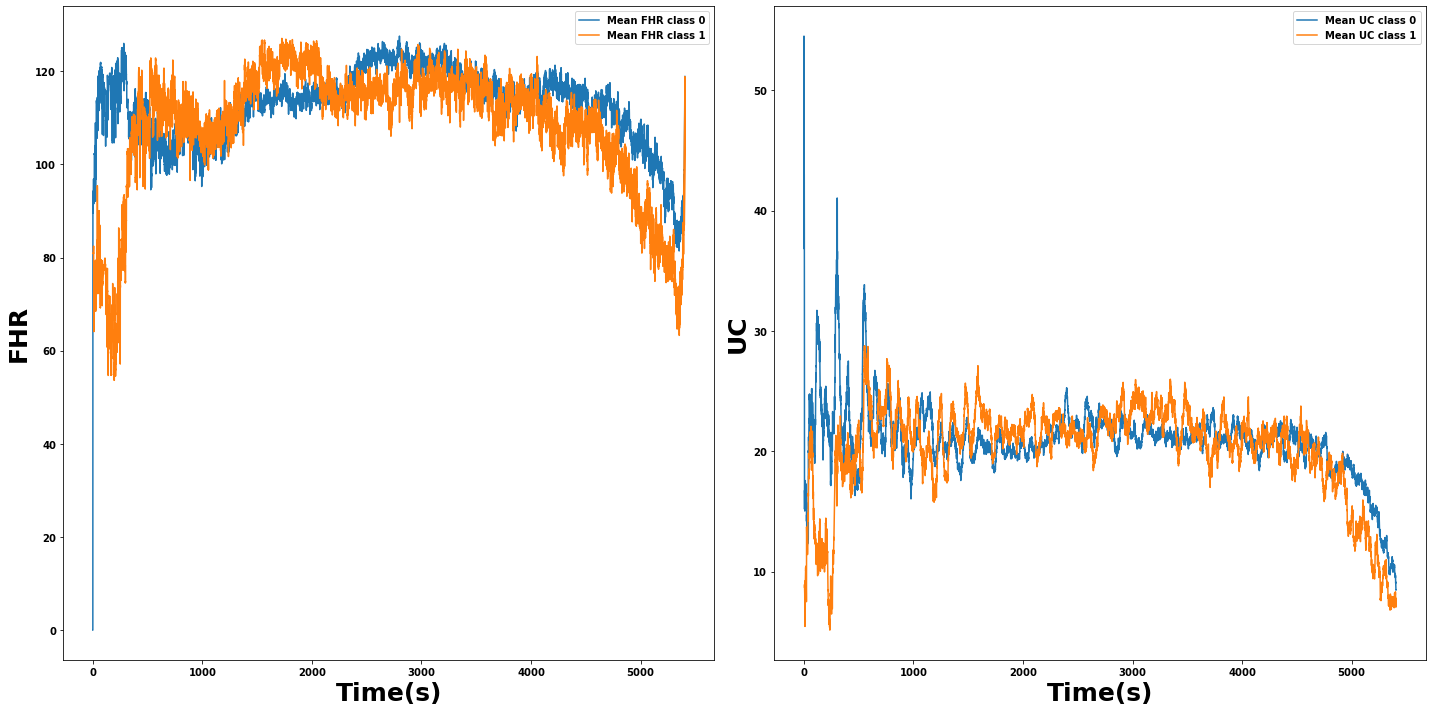

In [3]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

ax[0].plot(fhr[y == 0].mean().index, fhr[y == 0].mean().values, label='Mean FHR class 0')
ax[0].plot(fhr[y == 1].mean().index, fhr[y == 1].mean().values, label='Mean FHR class 1')
ax[1].plot(uc[y == 0].mean().index, uc[y == 0].mean().values, label='Mean UC class 0')
ax[1].plot(uc[y == 1].mean().index, uc[y == 1].mean().values, label='Mean UC class 1')

ax[0].set_xlabel('Time(s)', fontsize=25)
ax[1].set_xlabel('Time(s)', fontsize=25)
ax[0].set_ylabel('FHR', fontsize=25)
ax[1].set_ylabel('UC', fontsize=25)
ax[0].legend()
ax[1].legend()
fig.tight_layout()
plt.savefig(f"{paths.ORIGINAL_DATA_PLOTS}/Means_plots.pdf")
plt.savefig(f"{paths.ORIGINAL_DATA_PLOTS}/Means_plots.png")

In [4]:
fhr_no_extreme = fhr.copy()
fhr_no_extreme[(fhr_no_extreme == 0) | (fhr_no_extreme >= 250)] = 0

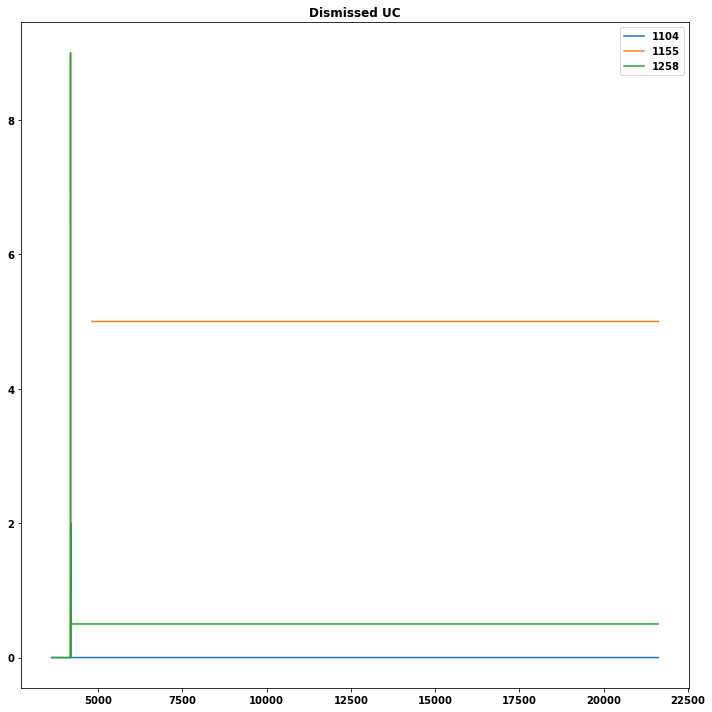

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
for uc_idx in [1104, 1155, 1258]:
    ax.plot(uc.loc[uc_idx].values, label=uc_idx)
ax.set_title('Dismissed UC')
ax.legend()
fig.tight_layout()
plt.savefig(f"{paths.ORIGINAL_DATA_PLOTS}/Dismissed_uc.pdf")
plt.savefig(f"{paths.ORIGINAL_DATA_PLOTS}/Dismissed_uc.png")

In [10]:
for idx, row in uc.copy().iterrows():
    if idx <= 1507:
        continue
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
    uc_signal = uc.copy().loc[idx].values
    uc_signal[uc_signal == 0] = np.nan

    ax.plot(uc.columns.to_numpy(), uc_signal)
    ax.set_title(f"{idx}")
    ax.set_xlim((0, 5405))
    plt.savefig(f'{idx}.png')
    del fig
    del ax
    del uc_signal
    plt.close()

In [18]:
uc.loc[1130][~uc.loc[1130].isna() & ~(uc.loc[1130] == 0)].describe()


count    20254.000000
mean        20.466056
std          3.468467
min          3.000000
25%         20.000000
50%         20.000000
75%         20.500000
max         45.000000
Name: 1130, dtype: float64